In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon

In [2]:
abbrs = [
    'BOS','NYY','TBR','TOR','BAL',
    'DET','MIN','KCR','CLE','CHW',
    'HOU','LAA','OAK','TEX','SEA',
    'NYM','ATL','WSN','MIA','PHI',
    'CIN','CHC','PIT','MIL','STL',
    'LAD','SDP','SFG','COL','ARI'
]

full_tm_name = [
    'Boston Red Sox', 'New York Yankees', 'Tampa Bay Rays', 'Toronto Blue Jays', 'Baltimore Orioles',
    'Detroit Tigers', 'Minnesota Twins', 'Kansas City Royals', 'Cleveland Indians', 'Chicago White Sox',
    'Houston Astros', 'Los Angeles Angels', 'Oakland Athletics', 'Texas Rangers', 'Seattle Mariners',
    'New York Mets', 'Atlanta Braves', 'Washington Nationals', 'Miami Marlins', 'Philadelphia Phillies',
    'Cincinnati Reds', 'Chicago Cubs', 'Pittsburgh Pirates', 'Milwaukee Brewers', 'St. Louis Cardinals',
    'Los Angeles Dodgers', 'San Diego Padres', 'San Francisco Giants', 'Colorado Rockies', 'Arizona Diamondbacks'
]

In [3]:
abbr_map = dict(zip(full_tm_name, abbrs))

In [4]:
def get_tm_data():
    url = "https://widgets.sports-reference.com/wg.fcgi?css=1&site=br&url=%2Fleagues%2FMLB-standings.shtml&div=div_expanded_standings_overall"
    df = pd.read_html(url)[0].iloc[:-1,:]
    return df

In [5]:
df=get_tm_data()
df.head()

,Rk,Tm,W,L,W-L%,Strk,R,RA,Rdiff,SOS,...,Road,ExInn,1Run,vRHP,vLHP,≥.500,<.500,last10,last20,last30
0,1.0,San Francisco Giants,93,50,0.650,W 7,4.9,3.7,1.2,0.0,...,48-27,9-7,27-15,67-31,26-19,43-32,50-18,9-1,14-6,21-9
1,2.0,Los Angeles Dodgers,91,53,0.632,W 3,5.0,3.4,1.6,0.0,...,42-30,4-13,22-24,63-39,28-14,45-34,46-19,6-4,13-7,22-8
2,3.0,Tampa Bay Rays,89,54,0.622,L 1,5.4,4.2,1.2,-0.1,...,44-28,6-12,18-21,56-29,33-25,45-36,44-18,5-5,14-6,20-10
3,4.0,Milwaukee Brewers,89,55,0.618,W 5,4.7,3.7,1.0,-0.3,...,49-24,10-8,20-12,71-40,18-15,37-31,52-24,7-3,14-6,21-9
4,5.0,Houston Astros,83,59,0.585,W 1,5.3,4.0,1.3,-0.1,...,38-32,7-7,16-16,52-33,31-26,43-31,40-28,5-5,11-9,17-13


In [6]:
def calc_win_pct(record: str) -> float:
    "takes a string in a WW-LL format and calculates win percentage"
    win, loss = [ float(w_l) for w_l in record.split("-")]
    win_pct = win/(win+loss)
    return round(win_pct, 3)

In [7]:
def add_win_pct(df):
    df["win_pct_above_500"] = df["≥.500"].apply(calc_win_pct)
    df["win_pct_below_500"] = df["<.500"].apply(calc_win_pct)
    return df

def add_abbr(df):
    df["abbr"] = df.Tm.map(abbr_map)
    return df

In [8]:
plt.xkcd()

In [16]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.1)

In [17]:
plot_df = df.pipe(add_win_pct).pipe(add_abbr)

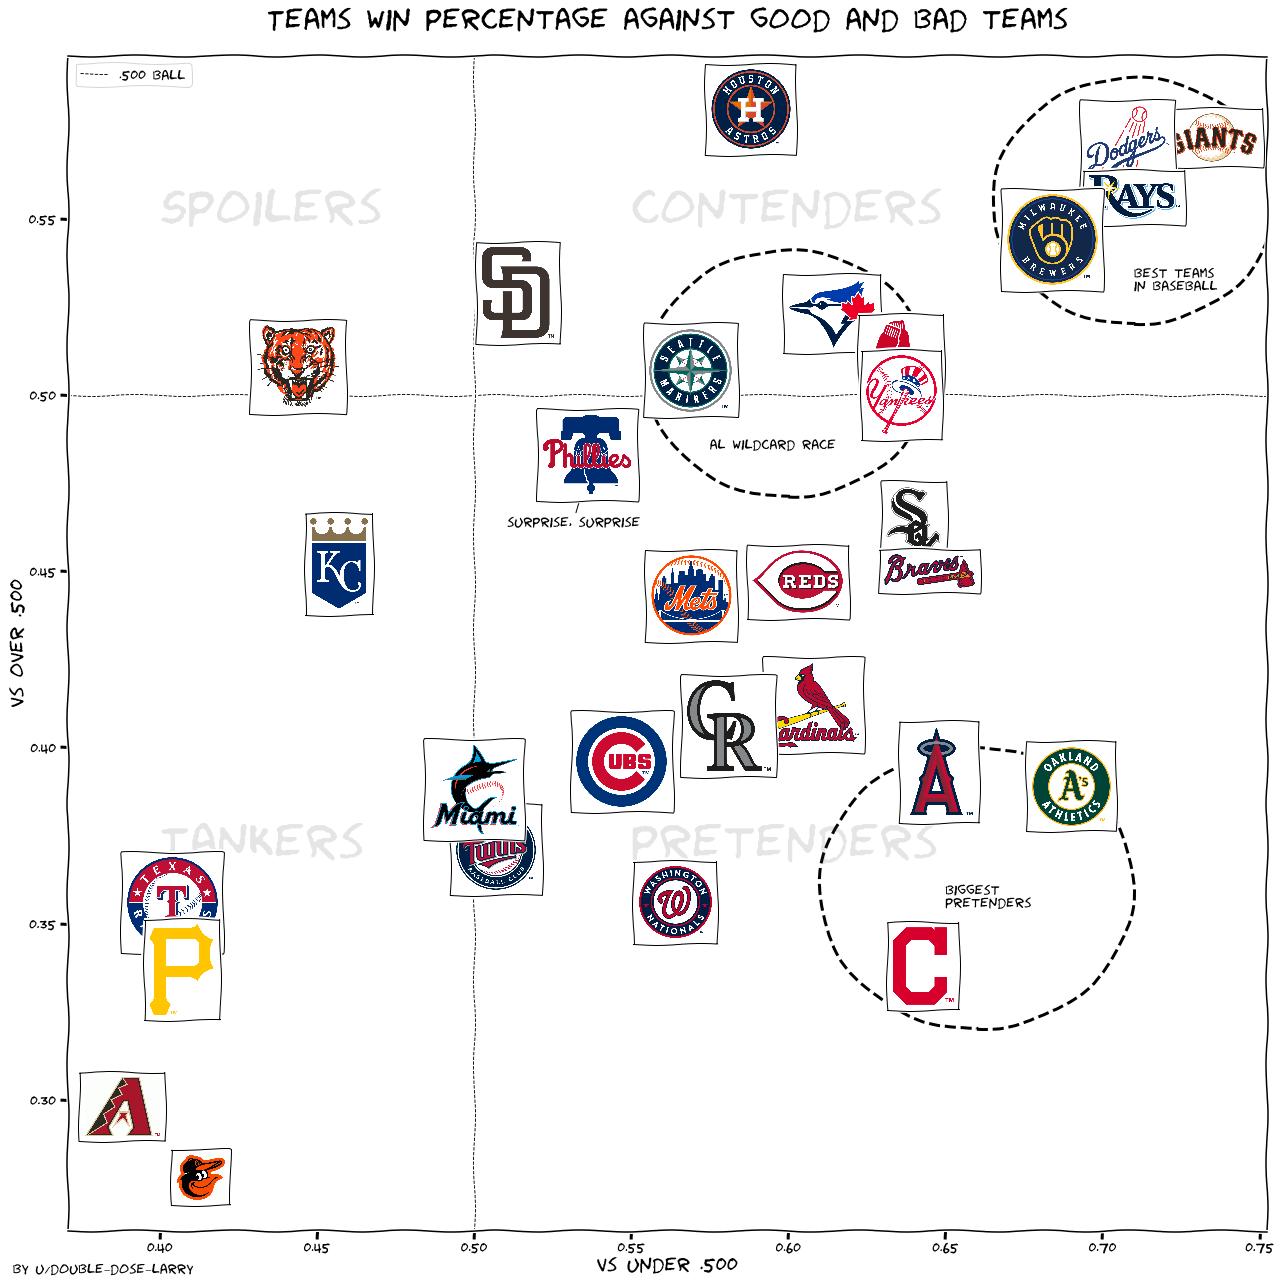

In [26]:
# define some styles
conf = dict(
    label_size=20,
    title_size=30,
    quad_text_size = 50,
    quad_text_alpha = .05
)

f, ax = plt.subplots(figsize=(18,18))
ax.scatter(df.win_pct_below_500, df.win_pct_above_500)
ax.axhline(.5, ls='--', c='k', lw=0.9, label=".500 ball")
ax.axvline(.5, ls='--', c='k', lw=0.9)

imgs = [
    ax.add_artist(
        AnnotationBbox(getImage(f'{tm.abbr}.png'),
                      (tm.win_pct_below_500, tm.win_pct_above_500),
                       frameon=True
                      )
    )
    for tm in plot_df.itertuples()
]

# quadrant descriptions
ax.annotate("Spoilers",(.4,.55),fontsize=conf["quad_text_size"],alpha=conf["quad_text_alpha"])
ax.annotate("contenders",(.55,.55),fontsize=conf["quad_text_size"],alpha=conf["quad_text_alpha"])
ax.annotate("Tankers",(.4,.37),fontsize=conf["quad_text_size"],alpha=conf["quad_text_alpha"])
ax.annotate("pretenders",(.55,.37),fontsize=conf["quad_text_size"],alpha=conf["quad_text_alpha"])

# annotate best teams in baseball
ax.add_patch(Ellipse(xy=(.71,.555), 
                     width=.09, 
                     height=.07, fill=False, ls="--", lw=3))
ax.annotate("best teams\nin baseball", (0.71, 0.53))

# annotate al wildcard race
ax.add_patch(Ellipse(xy=(.6,.506), 
                     width=.09, 
                     height=.07, fill=False, ls="--", lw=3))
ax.annotate("al wildcard race", (0.575, 0.485))

# annotate biggest pretenders
ax.add_patch(Ellipse(xy=(.66,.36), 
                     width=.1, 
                     height=.08, fill=False, ls="--", lw=3))
ax.annotate("biggest\npretenders", (0.65, 0.355))

# annotate phillies
ax.annotate(
    "surprise, surprise",
    (.536, 0.48),
    xytext = (-80,-60),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate tigers
# ax.annotate(
#     "somehow this\ntigers logo seemed\nmost approriate",
#     (.45, 0.51),
#     xytext = (-180,50),
#         textcoords="offset pixels",
#         arrowprops=dict(
#                      arrowstyle="->")
# )

plt.legend()
plt.xlabel("vs under .500", size=conf["label_size"])
plt.ylabel("vs over .500", size=conf["label_size"])
plt.title("Teams win % against good and bad teams", size=conf["title_size"], pad=30)
plt.tight_layout()
plt.annotate("by u/double_dose_larry", (.01,.01), xycoords='figure fraction')
plt.savefig("records_vs_above_500.png")